In [30]:
## Import packages

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
## Load data

df = pd.read_csv('../../raw_data/beema/cleaned_data/top_200_song_consumption_cleaned.csv')

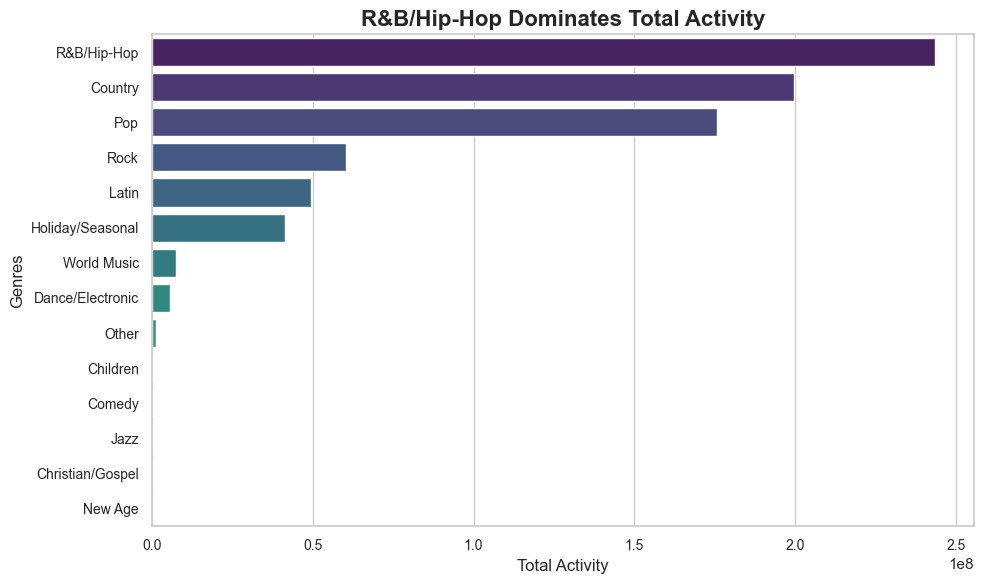

In [32]:
## Bar graph for Genres vs. Total Activity

activity_by_genre = df.groupby('Genre')['TW Total Activity'].sum().sort_values(ascending=False)

# Convert Series to DataFrame for Seaborn
activity_df = activity_by_genre.reset_index()
activity_df.columns = ['Genre', 'Total Activity']

# Seaborn barplot template
def create_bar_chart(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create the barplot
    sns.barplot(data=data, x=x_column, y=y_column, hue=y_column, palette="viridis")
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=10)  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the template
create_bar_chart(
    data=activity_df,
    x_column='Total Activity',
    y_column='Genre',
    title='R&B/Hip-Hop Dominates Total Activity',
    x_label='Total Activity',
    y_label='Genres'
)

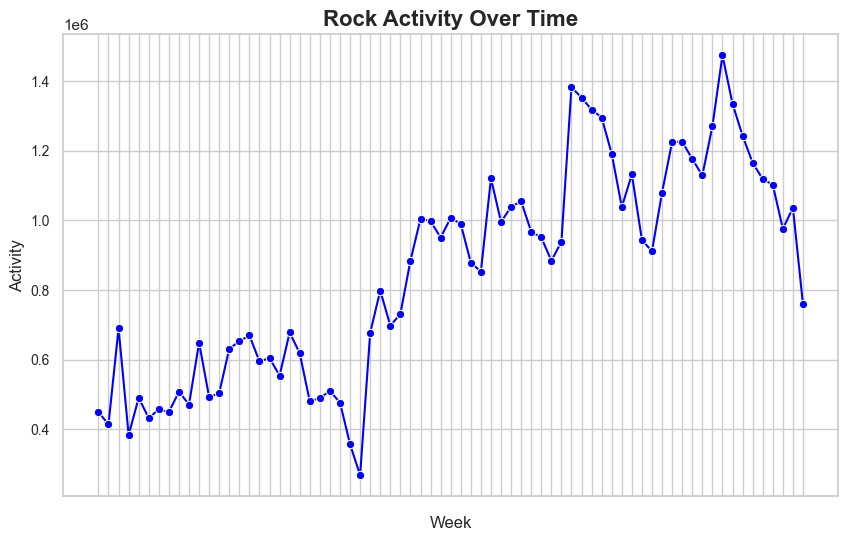

In [35]:
## Line graph for Rock Activity over Time

rock_over_time = df[df['Genre'] == 'Rock'].groupby('week_of')['TW Total Activity'].sum()

# Convert Series to DataFrame for Seaborn
rock_over_time_df = rock_over_time.reset_index()
rock_over_time_df.columns = ['Week', 'Total Activity']

# Seaborn line plot template
def create_line_graph(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create the line plot
    sns.lineplot(data=data, x=x_column, y=y_column, marker='o', color='blue')
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=0, color='white')  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks

    
    # Show the plot
    plt.show()

# Use the template
create_line_graph(
    data=rock_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Rock Activity Over Time',
    x_label = 'Week',
    y_label='Activity'
)

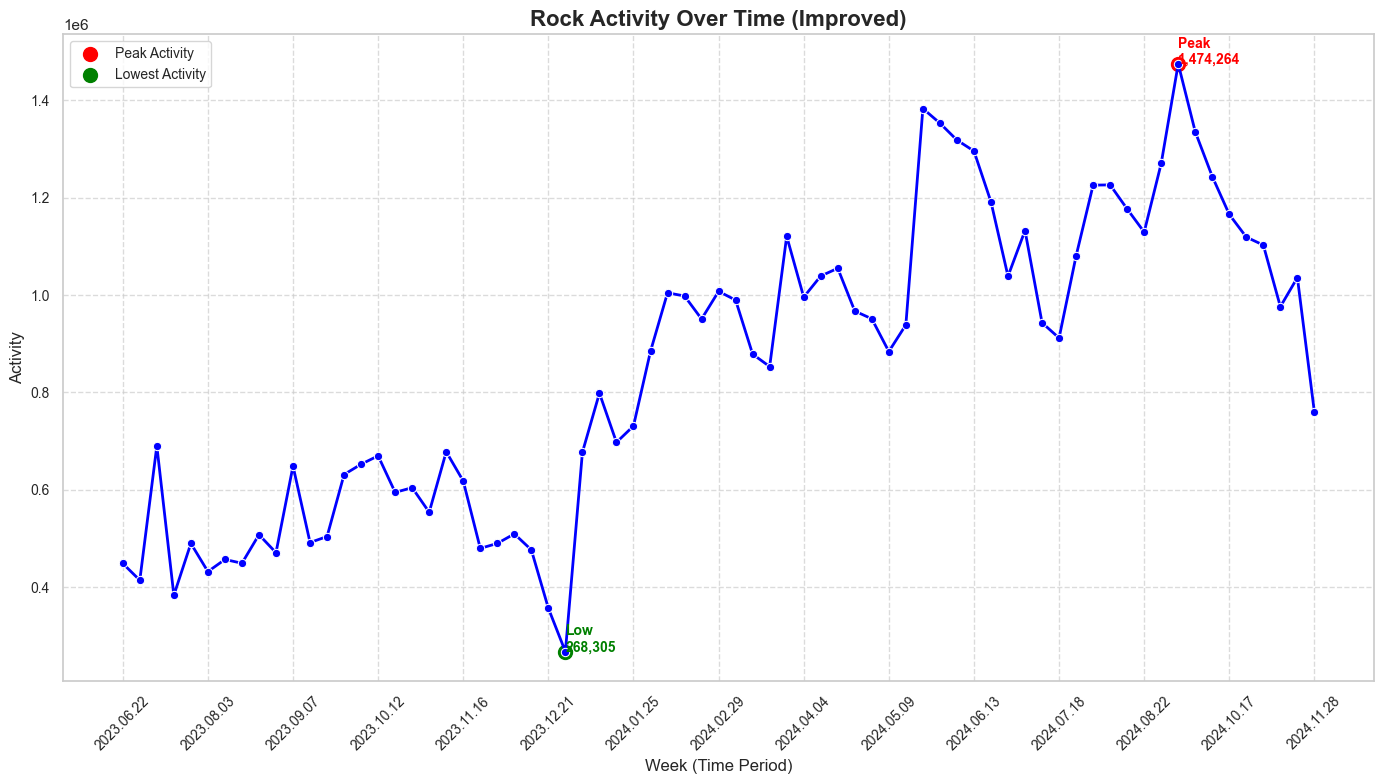

In [37]:
def create_line_graph(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid") 
    plt.figure(figsize=(14, 8)) 
    
    # Plot the line graph
    sns.lineplot(
        data=data,
        x=x_column,
        y=y_column,
        marker='o',
        color='blue',
        linewidth=2
    )
    
    # Highlight special points (e.g., peaks and troughs)
    max_point = data[data[y_column] == data[y_column].max()]
    min_point = data[data[y_column] == data[y_column].min()]
    plt.scatter(max_point[x_column], max_point[y_column], color='red', s=100, label='Peak Activity')
    plt.scatter(min_point[x_column], min_point[y_column], color='green', s=100, label='Lowest Activity')
    
    # Annotate special points
    for _, row in max_point.iterrows():
        plt.text(row[x_column], row[y_column], f'Peak\n{int(row[y_column]):,}', color='red', fontsize=10, weight='bold')
    for _, row in min_point.iterrows():
        plt.text(row[x_column], row[y_column], f'Low\n{int(row[y_column]):,}', color='green', fontsize=10, weight='bold')

    # Optimize x-axis ticks (e.g., show every 5th week)
    tick_step = 5
    ticks = data[x_column][::tick_step]
    plt.xticks(ticks=ticks, labels=ticks, fontsize=10, rotation=45)
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  
    plt.xlabel(x_label, fontsize=12) 
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(fontsize=10, rotation=45)  
    plt.yticks(fontsize=10)
    
    # Add a legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Add grid and tight layout
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Use the updated template
create_line_graph(
    data=rock_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Rock Activity Over Time (Improved)',
    x_label='Week (Time Period)',
    y_label='Activity'
)

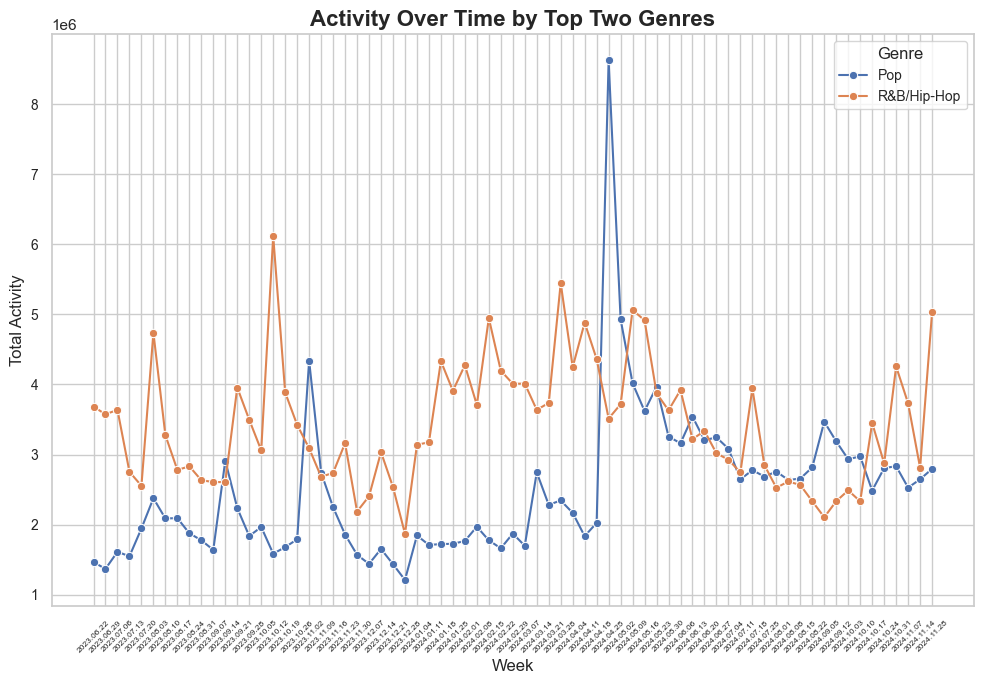

In [38]:
# Group data by week_of and Genre
activity_over_time = df[df['Genre'].isin(['Pop', 'R&B/Hip-Hop'])].groupby(['week_of', 'Genre'])['TW Total Activity'].sum().reset_index()

# Seaborn line plot template for multiple genres
def create_multi_genre_line_graph(data, x_column, y_column, hue_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 7))  # Set the figure size
    
    # Create the line plot with hue for multiple lines
    sns.lineplot(data=data, x=x_column, y=y_column, hue=hue_column, marker='o')
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=6, rotation=45)  # Rotate x-axis ticks for better readability
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.legend(title=hue_column, fontsize=10)  # Add legend
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the template
create_multi_genre_line_graph(
    data=activity_over_time,
    x_column='week_of',
    y_column='TW Total Activity',
    hue_column='Genre',
    title='Activity Over Time by Top Two Genres',
    x_label='Week',
    y_label='Total Activity'
)

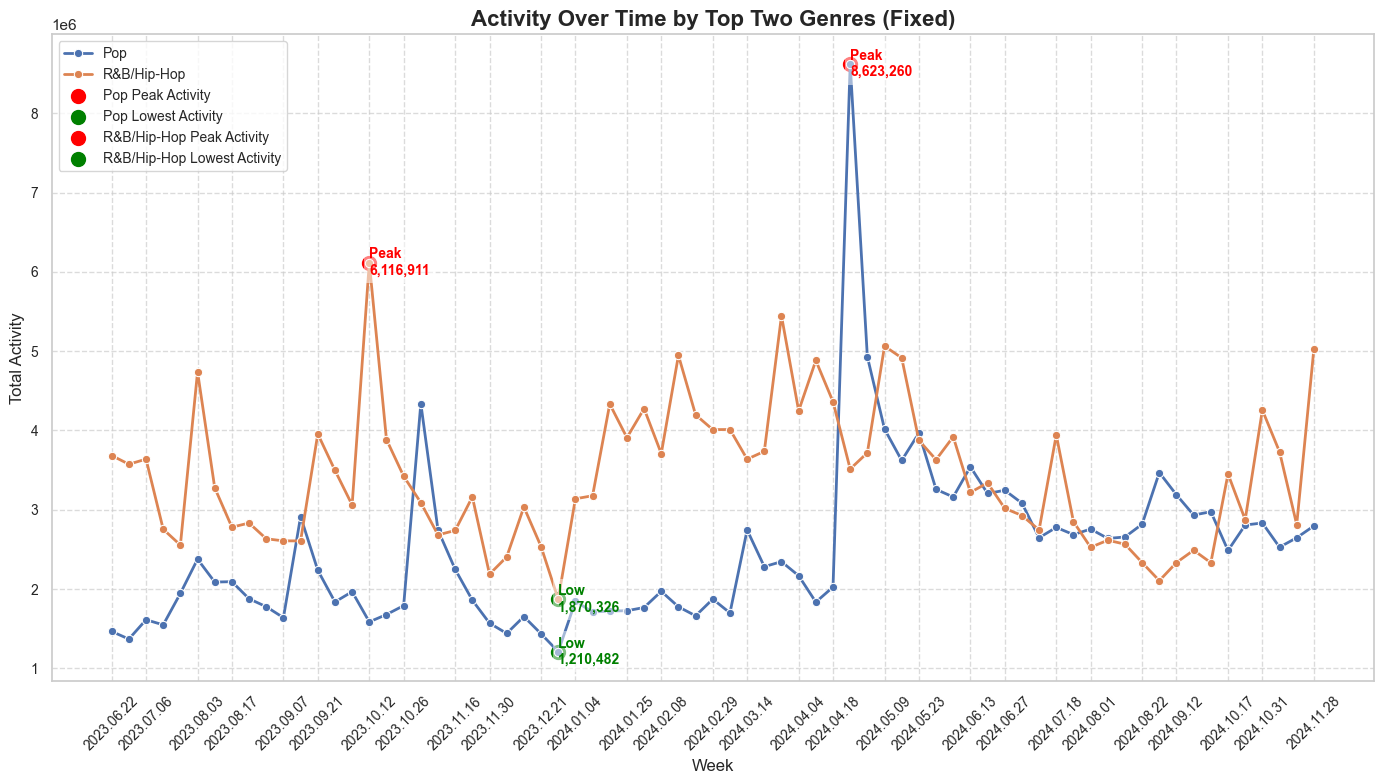

In [39]:
def create_multi_genre_line_graph(data, x_column, y_column, hue_column, title, x_label, y_label):
    sns.set(style="whitegrid")  
    plt.figure(figsize=(14, 8))  

    # Create the line plot with hue for multiple lines
    sns.lineplot(
        data=data, 
        x=x_column, 
        y=y_column, 
        hue=hue_column, 
        marker='o',
        linewidth=2
    )

    # Highlight peak and lowest points for each genre
    for genre in data[hue_column].unique():
        genre_data = data[data[hue_column] == genre]
        max_point = genre_data[genre_data[y_column] == genre_data[y_column].max()]
        min_point = genre_data[genre_data[y_column] == genre_data[y_column].min()]
        
        # Scatter points for peak and lowest
        plt.scatter(
            max_point[x_column],
            max_point[y_column],
            color='red',
            s=100,
            label=f'{genre} Peak Activity'
        )
        plt.scatter(
            min_point[x_column],
            min_point[y_column],
            color='green',
            s=100,
            label=f'{genre} Lowest Activity'
        )
        
        # Annotate the points
        for _, row in max_point.iterrows():
            plt.text(
                row[x_column], 
                row[y_column], 
                f'Peak\n{int(row[y_column]):,}', 
                color='red', 
                fontsize=10, 
                weight='bold', 
                ha='left',  # Align text to the left
                va='center',  # Center vertically
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Add a background box
            )
        for _, row in min_point.iterrows():
            plt.text(
                row[x_column], 
                row[y_column], 
                f'Low\n{int(row[y_column]):,}', 
                color='green', 
                fontsize=10, 
                weight='bold', 
                ha='left',  # Align text to the left
                va='center',  # Center vertically
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Add a background box
            )

    # Optimize x-axis ticks (e.g., show every 5th week)
    tick_step = 5
    ticks = data[x_column][::tick_step]
    plt.xticks(ticks=ticks, labels=ticks, fontsize=10, rotation=45)

    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.legend(loc='upper left', fontsize=10)  # Add legend
    plt.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the updated template
create_multi_genre_line_graph(
    data=activity_over_time,
    x_column='week_of',
    y_column='TW Total Activity',
    hue_column='Genre',
    title='Activity Over Time by Top Two Genres (Fixed)',
    x_label='Week',
    y_label='Total Activity'
)

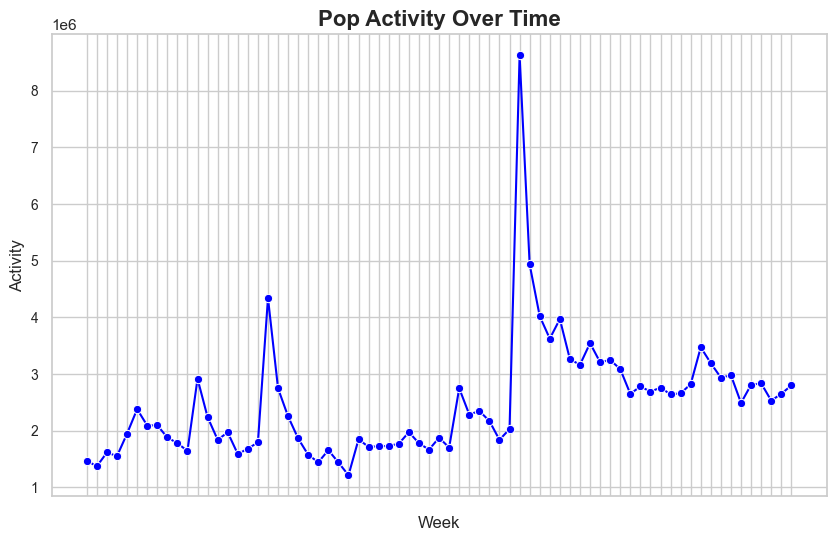

In [29]:
## Line graph for Rock Activity over Time

pop_over_time = df[df['Genre'] == 'Pop'].groupby('week_of')['TW Total Activity'].sum()

# Convert Series to DataFrame for Seaborn
pop_over_time_df = pop_over_time.reset_index()
pop_over_time_df.columns = ['Week', 'Total Activity']

# Use the template
create_line_graph(
    data=pop_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Pop Activity Over Time',
    x_label = 'Week',
    y_label='Activity'
)

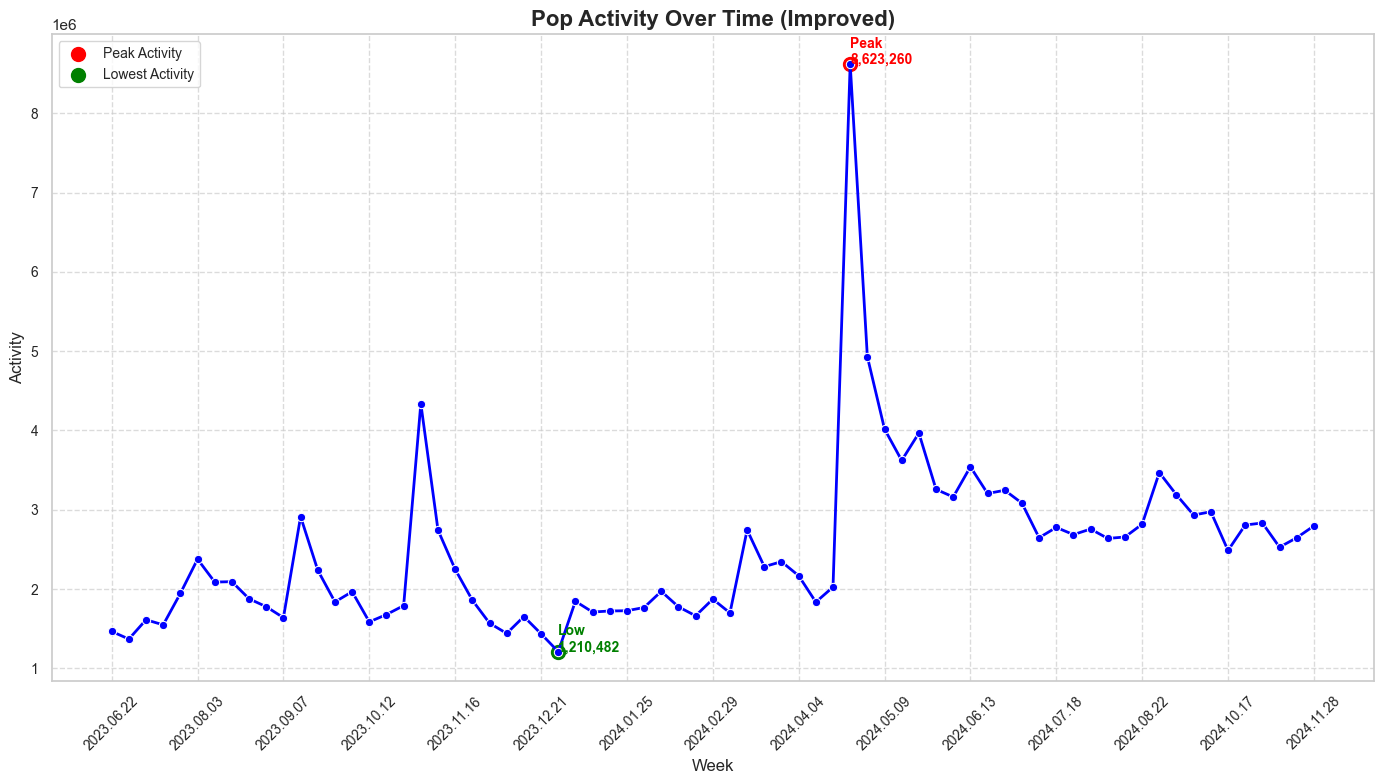

In [40]:
create_line_graph(
    data=pop_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Pop Activity Over Time (Improved)',
    x_label='Week',
    y_label='Activity'
)